Detection 0: Left: 18 Top: 43 Right: 241 Bottom: 266


True

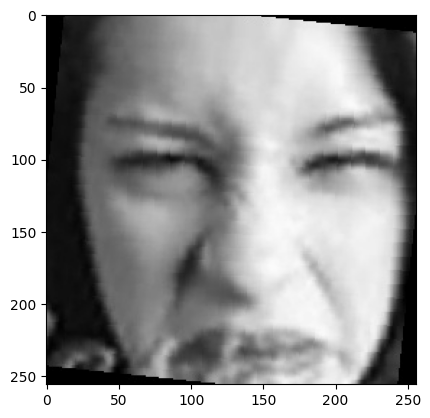

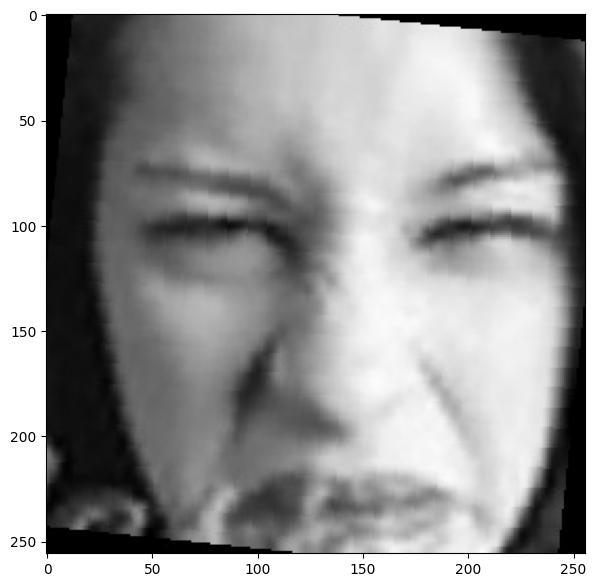

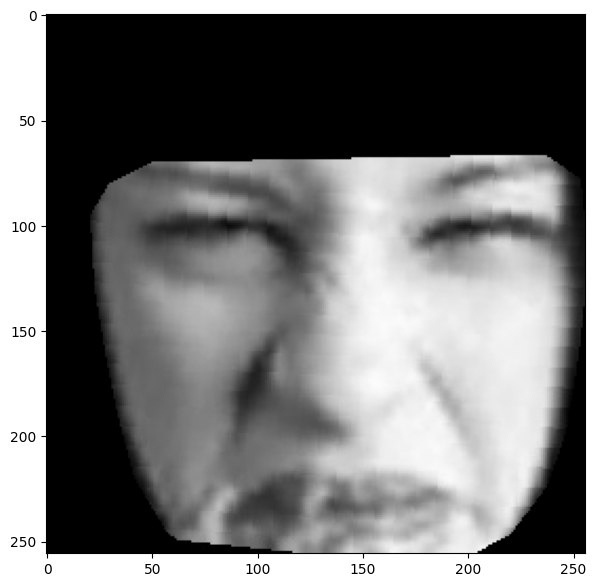

In [2]:
import dlib
import cv2
import matplotlib.pyplot as plt
import numpy as np

#http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
face_detector = dlib.get_frontal_face_detector()
landmark_detector = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
img = dlib.load_rgb_image("aligned.jpg")
base_img = img.copy()
plt.imshow(img)

faces = face_detector(img, 1)
faces

img = base_img.copy()
landmark_tuple = []
for k, d in enumerate(faces):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
    
    landmarks = landmark_detector(img, d)
    #print(landmarks)
    
    for n in range(0, 27):
        x = landmarks.part(n).x 
        y = landmarks.part(n).y 
        landmark_tuple.append((x, y))
        
        cv2.circle(img, (x, y), 2, (255, 255, 0), -1)
        

routes = []

for i in range(15, -1, -1):
    from_coordinate = landmark_tuple[i+1]
    to_coordinate = landmark_tuple[i]
    routes.append(from_coordinate)

from_coordinate = landmark_tuple[0]
to_coordinate = landmark_tuple[17]
routes.append(from_coordinate)

for i in range(17, 20):
    from_coordinate = landmark_tuple[i]
    to_coordinate = landmark_tuple[i+1]    
    routes.append(from_coordinate)

from_coordinate = landmark_tuple[19]
to_coordinate = landmark_tuple[24]
routes.append(from_coordinate)

for i in range(24, 26):
    from_coordinate = landmark_tuple[i]
    to_coordinate = landmark_tuple[i+1]    
    routes.append(from_coordinate)

#---------------------------------------

from_coordinate = landmark_tuple[26]
to_coordinate = landmark_tuple[16]
routes.append(from_coordinate)
routes.append(to_coordinate)

img = base_img.copy()
for i in range(0, len(routes)-1):
    from_coordinate = routes[i]
    to_coordinate = routes[i+1]
    
    #print(from_coordinate," to ",to_coordinate)
    
    # Showing the mask outline to the face
    # img = cv2.line(img, from_coordinate, to_coordinate, (255, 255, 0), 1)
plt.figure(figsize = (7,7))
plt.imshow(img)

mask = np.zeros((img.shape[0], img.shape[1]))
mask = cv2.fillConvexPoly(mask, np.array(routes), 1)
mask = mask.astype(bool)
#plt.imshow(mask)

out = np.zeros_like(img)
out[mask] = img[mask]
plt.figure(figsize = (7,7))
plt.imshow(out)

# save the image
cv2.imwrite('normalized.jpg', out)